In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from liquidity.price_impact.trades_impact import get_aggregate_trade_response_features

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
'''
Part 1
1. fit power law on RN and QN

* Get all MO series
* R_N - average return over N steps
* Q_N - average volume imbalance over N steps
* E_N - average sign imbalance over N steps
* Plot R_N and Q_N as distribution on log scale
* Find scaling factors ("alpha") for R_N and Q_N by fitting power laws

2. Define sigmoid and pass as function to power law

* Find/load zeta and chi exponents from fitting scaling form on all N data – should demonstrate individual scaling functions then collapse into scaling form
* Exponents from zeta and chi should resemble each other pair-wise (zeta-imbalance, chi-returns)

3. Repeat 1-2 for R_N and E_N

7. Repeat 1-2 for other stocks

Part 2
1. Impact of 1 order
2. Impact of aggregate
3. Liquidity parameters (rate and magnitude of change)

'''

'\nPart 1\n1. fit power law on RN and QN\n\n* Get all MO series\n* R_N - average return over N steps\n* Q_N - average volume imbalance over N steps\n* E_N - average sign imbalance over N steps\n* Plot R_N and Q_N as distribution on log scale\n* Find scaling factors ("alpha") for R_N and Q_N by fitting power laws\n\n2. Define sigmoid and pass as function to power law\n\n* Find/load zeta and chi exponents from fitting scaling form on all N data – should demonstrate individual scaling functions then collapse into scaling form\n* Exponents from zeta and chi should resemble each other pair-wise (zeta-imbalance, chi-returns)\n\n3. Repeat 1-2 for R_N and E_N\n\n7. Repeat 1-2 for other stocks\n\nPart 2\n1. Impact of 1 order\n2. Impact of aggregate\n3. Liquidity parameters (rate and magnitude of change)\n\n'

# 1. Generate series of $R_N, Q_N, E_N$

In [4]:
# def generate_aggregate_feature_series(df_, T):
#     result = get_aggregate_trade_response_features(df_, T=T)
#     data = result.rename(columns={f'R{T}': 'R'})
#     data['T'] = T
#     cols = ['vol_imbalance', 'sign_imbalance', 'T', 'R']
#     return data[cols]

In [5]:
# lags = range(1, 1001)

In [6]:
# result_dict = {}
# for N in lags:
#     agg_features = generate_aggregate_feature_series(tsla_df, N)
#     result_dict[N] = agg_features

In [7]:
# save result in pickle
# pickle.dump(result_dict, open("tsla_aggregate_features_mo.pkl", "wb"))

## 1.1. Compute average of $R_N, Q_N, E_N$ for each $N$

In [8]:
# Load data from pkl
tsla_agg_features = pickle.load(open('../datasets/tsla_aggregate_features_mo.pkl', 'rb'))
tsla_agg_features[1000].head()

,vol_imbalance,sign_imbalance,T,R
0,-8.174464,-5.968747,1000,-0.310
1,37.254630,19.099990,1000,1.940
2,-70.830808,-66.849966,1000,-2.570
3,35.804952,79.981209,1000,1.845
4,83.180703,66.849966,1000,2.715


In [9]:
RN_averages = {k: v['R'].mean() for k,v in tsla_agg_features.items()}

In [10]:
QN_averages = {k: v['vol_imbalance'].mean() for k,v in tsla_agg_features.items()}

In [11]:
EN_averages = {k: v['sign_imbalance'].mean() for k,v in tsla_agg_features.items()}

## 1.2. Plot distributions of $R_N, Q_N, E_N$

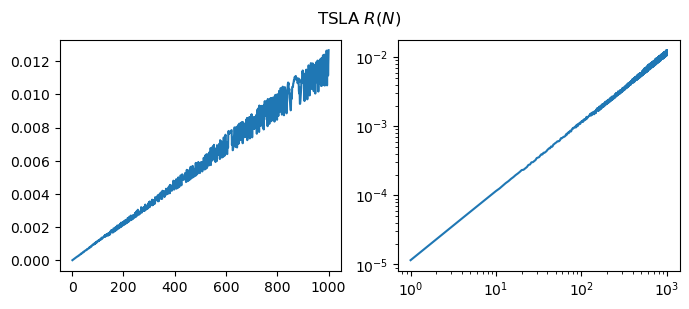

In [12]:
# R_N
plt.figure(figsize=(8, 3))
plt.suptitle('TSLA $R(N)$')
plt.subplot(1, 2, 1)
plt.plot(RN_averages.keys(), [abs(x) for x in RN_averages.values()])
plt.subplot(1, 2, 2)
plt.plot(RN_averages.keys(), [abs(x) for x in RN_averages.values()])
plt.loglog()
plt.show()

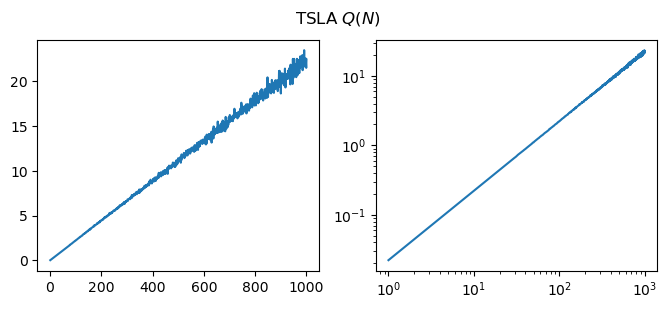

In [13]:
# Q_N
plt.figure(figsize=(8, 3))
plt.suptitle('TSLA $Q(N)$')
plt.subplot(1, 2, 1)
plt.plot(QN_averages.keys(), QN_averages.values())
plt.subplot(1, 2, 2)
plt.plot(QN_averages.keys(), QN_averages.values())
plt.loglog()
plt.show()

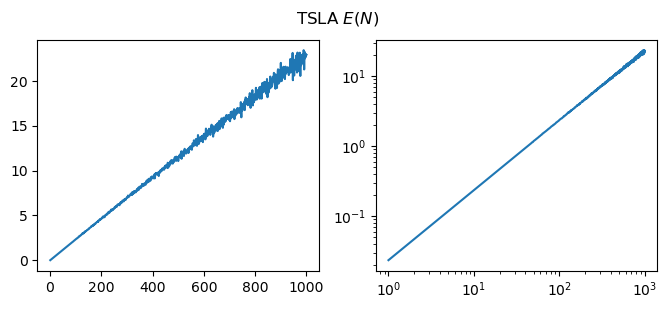

In [14]:
# E_N
plt.figure(figsize=(8, 3))
plt.suptitle('TSLA $E(N)$')
plt.subplot(1, 2, 1)
plt.plot(EN_averages.keys(), [abs(x) for x in EN_averages.values()])
plt.subplot(1, 2, 2)
plt.plot(EN_averages.keys(), [abs(x) for x in EN_averages.values()])
plt.loglog()
plt.show()

## 1.3. Find scaling factors ("$\alpha$") for $R_N$ and $Q_N$ by fitting power laws

In [15]:
RN = [abs(x) for x in RN_averages.values()]
RN

[1.1516753080814015e-05,
 2.3125904180614495e-05,
 3.468881048267361e-05,
 4.630460722922136e-05,
 5.781453151089994e-05,
 6.937734623730892e-05,
 8.089403851129146e-05,
 9.208122577851989e-05,
 0.00010359124226332675,
 0.00011562829989440401,
 0.00012581310256708168,
 0.0001381211094039576,
 0.0001504881857336525,
 0.00016077170418006515,
 0.00017344130516562154,
 0.00018416050686378152,
 0.00019679120385953253,
 0.00020718002328399477,
 0.0002188142649345451,
 0.00023244456177402492,
 0.00023478212662157822,
 0.0002455279358810559,
 0.0002569901939949622,
 0.0002762378433173902,
 0.0002795010559662109,
 0.0003009712069734743,
 0.0003022203214654851,
 0.00031322763055771337,
 0.0003244143316490603,
 0.0003468757424566424,
 0.0003531241049142785,
 0.00035797254487856606,
 0.00037742834741702453,
 0.0003935735762689076,
 0.0003912963134066366,
 0.0004143502019482089,
 0.00041365501074428873,
 0.00042508903044590716,
 0.00043601359003397796,
 0.0004551214361140476,
 0.0004694772161489360

In [16]:
 # create RN as function of N DataFrame
RN_N = pd.DataFrame({
    'x_values': RN_averages.keys(),
    'y_values': RN
})

In [17]:
RN_N

,x_values,y_values
0,1,0.000012
1,2,0.000023
2,3,0.000035
3,4,0.000046
4,5,0.000058
...,...,...
995,996,0.012503
996,997,0.012349
997,998,0.011138
998,999,0.011812


In [18]:
# Fit power law
from powerlaw_function import Fit

RN_fit = Fit(RN_N, verbose= True)

Fitting pure_powerlaw function using Nonlinear Least-squares fitting method.

For pure_powerlaw fitted using Nonlinear Least-squares;

Pre-fitting parameters:
xmin: 1.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 8.341434063009974e-06
alpha = -1.05202431524362

Goodness of fit to data:
BIC = -12994.806093653744
Adjusted R-squared = 0.9892425350549408


Using Linear fitting methods to approximation pure_powerlaw fit on Loglog scale. 


For pure_powerlaw fitted using OLS;

Pre-fitting parameters:
xmin: 1.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 1.0683459203831856e-05
alpha = -1.0125923052028356

Goodness of fit to data:
BIC = -12891.818447020032
Adjusted R-squared = 0.988076216728448



For pure_powerlaw fitted using RobustRegression;

Pre-fitting parameters:
xmin: 1.0

Fitting parameters:
param_names = ['C', 'alpha']
C = 1.0684027010462461e-05
alpha = -1.0126414570902496

Goodness of fit to data:
BIC = -12894.749195725899
Adjusted R-squared = 0.9881109853028394


In [19]:
RN_fit.fit_results_dict.keys()

dict_keys(['pure_powerlaw', 'OLS', 'RobustRegression', 'GeneralisedRegression'])

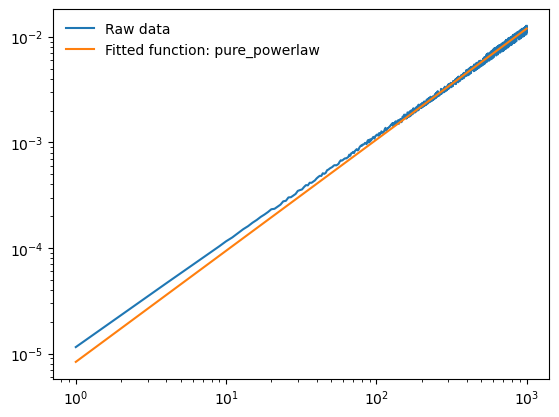

In [20]:
RN_fit.pure_powerlaw.plot_fit()

# 2. Define sigmoid and pass as function to power law